In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from pylab import rcParams
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [53]:
%matplotlib inline
np.random.seed(7)
rcParams['figure.figsize']=30,10
rcParams['font.size']=10
sns.set()
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv('Advertising.csv')
df.head(2)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [23]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [24]:
data_tv=np.array(df['TV'])
data_radio=np.array(df['radio'])

In [30]:
print(len(data_tv),"       ", len(data_radio))

200         200


In [60]:
def plot_distribution(inp):
    plt.figure()
    ax=sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,  max_ - max_ / 10, # coodinates where u want to place the text of mean value
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure
    

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

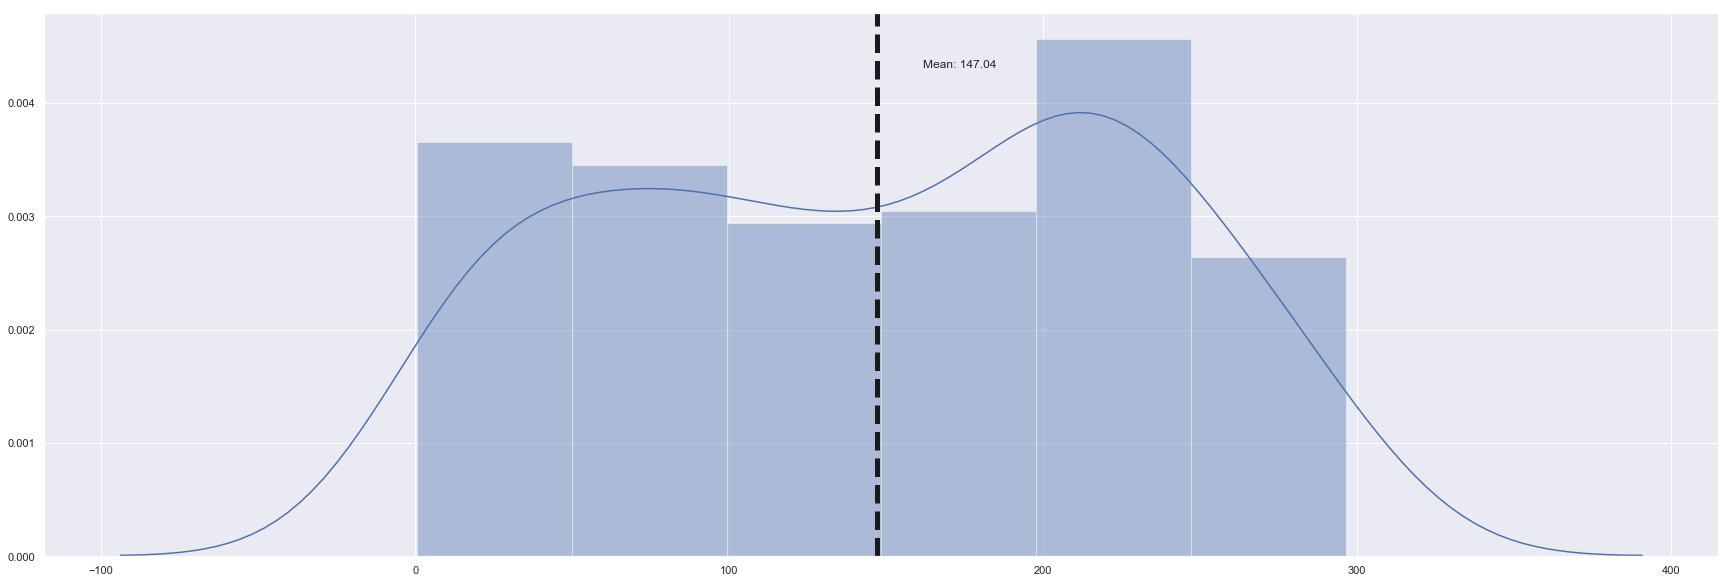

In [61]:
plot_distribution(data_tv)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

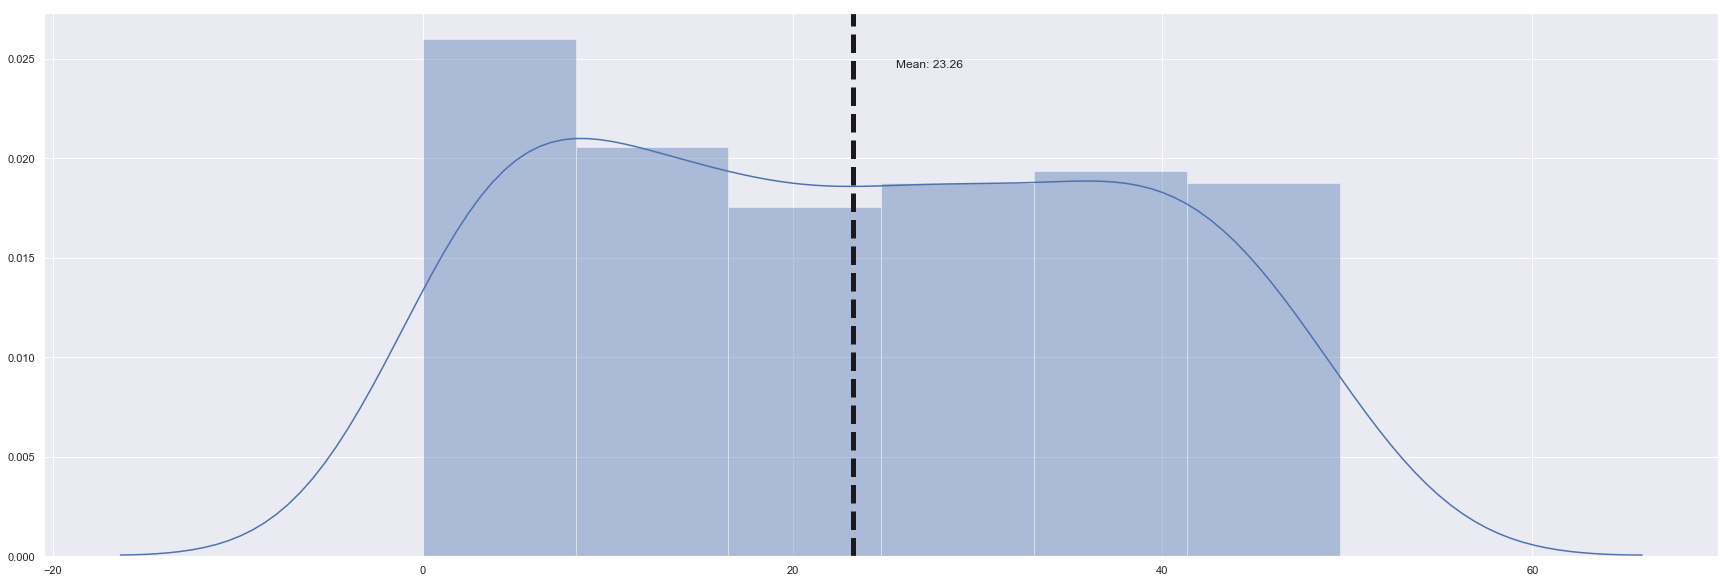

In [55]:
plot_distribution(data_radio)

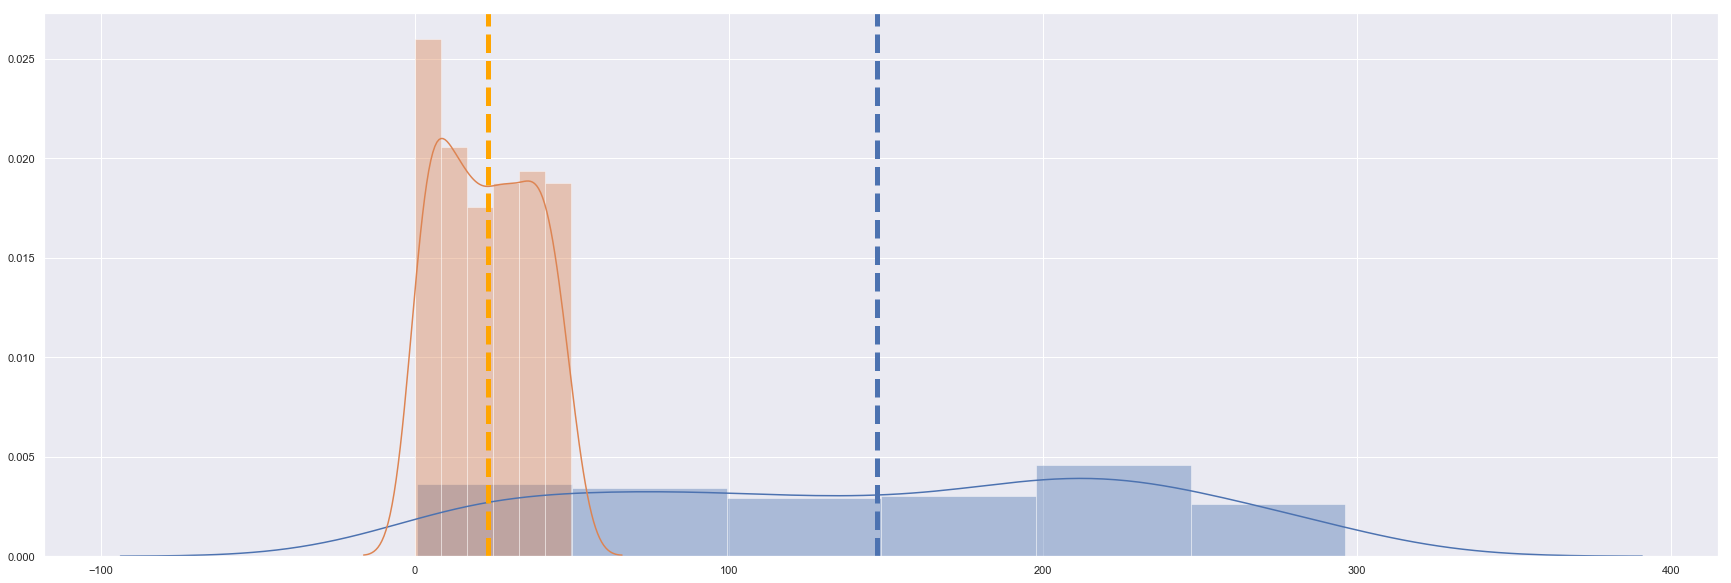

In [67]:
# creating both plots in one graph
plt.figure()
ax1=sns.distplot(data_tv)
ax2=sns.distplot(data_radio)
plt.axvline(np.mean(data_tv), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(data_radio), color='orange', linestyle='dashed', linewidth=5)

In [69]:
def compare_2_groups(arr1, arr2, alpha, sample_size):
    stats,p=ttest_ind(arr1, arr2)
    print("Statistics=%.3f , p=%.2f" %(stats,p) )
    if p>alpha:
        print("Fail to reject Ho- Null Hypothesis")
    else:
        print("Reject Ho - Null Hypothesis")

In [71]:
sample_size=100
data_tv1=np.random.choice(data_tv , sample_size)
data_radio1=np.random.choice( data_radio, sample_size)
compare_2_groups(data_tv1, data_radio1, 0.05, sample_size)

Statistics=13.845 , p=0.00
Reject Ho - Null Hypothesis
